In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from scipy import stats
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel("C:/Users/user/Documents/Assembled Defects/Project C.xlsx")
df

,Spur gear pitch tolerance,Spur gear runout tolerance,spur gear form defect tolerance,Crown wheel pitch tolerance,Crown wheel runout tolerance,Crown wheel form defect tolerance,Missalignment tolerance,Spur gear pitch process deviation,Spur gear runout process deviation,spur gear form defect process deviation,Crown wheel pitch process deviation,Crown wheel runout process deviation,Crown wheel form defect process deviation,Missalignment process deviation,KTE value,Assembled defects,Spur defetcs,Crown defects
0,14.2613,25.6450,6.57156,12.9093,20.6287,6.59968,20.7042,2.43774,2.84157,2.54729,2.74990,1.95905,2.53156,2.38007,16.6742,469,1,1
1,24.5933,21.9961,12.06760,13.4436,24.4904,9.99295,23.9285,2.84601,1.93702,2.91118,2.78829,2.97592,2.82859,1.37829,16.8606,184,1,1
2,19.3101,13.0066,15.14440,19.6327,12.3205,8.14270,18.1184,0.80668,2.91155,2.47351,2.67096,2.62128,2.28110,2.13865,17.0111,1450,1,1
3,18.2896,25.4438,6.19716,10.5032,18.2108,9.50820,22.5393,2.78999,2.77690,2.63503,2.96076,1.60445,2.92718,2.75220,17.3382,172,1,2
4,18.0943,15.6810,5.67492,13.8351,26.0245,5.26885,15.8469,2.92418,1.35473,2.19727,2.76921,1.18761,2.37965,1.15929,17.4882,165,49,367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,25.6434,20.5092,6.07370,28.1712,15.7973,12.38420,19.6279,2.84040,1.15353,2.48559,2.74558,2.70146,1.92176,1.16106,29.9901,68,539,1
1668,13.1434,27.1759,9.07370,11.4365,17.6155,13.53800,20.5103,2.96150,1.25357,2.56494,2.81980,2.76365,1.97788,1.21457,29.9905,0,170,1
1669,15.3309,17.7932,7.87370,12.2528,23.2353,14.78060,17.9151,2.36235,2.65418,1.37750,1.56036,1.33497,2.76359,1.96373,29.9957,0,36,65
1670,25.3309,24.4598,10.87370,15.1099,25.0535,15.93450,18.7975,2.48346,2.75423,1.45685,1.63458,1.39716,2.81971,2.01724,29.9961,362,5,13


In [3]:
missing_values = df.isnull().sum()
missing_values

Spur gear pitch tolerance                    0
Spur gear runout tolerance                   0
spur gear form defect tolerance              0
Crown wheel pitch tolerance                  0
Crown wheel runout tolerance                 0
Crown wheel form defect tolerance            0
Missalignment tolerance                      0
Spur gear pitch process deviation            0
Spur gear runout process deviation           0
spur gear form defect process deviation      0
Crown wheel pitch process deviation          0
Crown wheel runout process deviation         0
Crown wheel form defect process deviation    0
Missalignment process deviation              0
KTE value                                    0
Assembled defects                            0
Spur defetcs                                 0
Crown defects                                0
dtype: int64

In [3]:
columns = df.columns
print(columns[0:15])

Index(['Spur gear pitch tolerance', 'Spur gear runout tolerance',
       'spur gear form defect tolerance', 'Crown wheel pitch tolerance',
       'Crown wheel runout tolerance', 'Crown wheel form defect tolerance',
       'Missalignment tolerance', 'Spur gear pitch process deviation',
       'Spur gear runout process deviation',
       'spur gear form defect process deviation',
       'Crown wheel pitch process deviation',
       'Crown wheel runout process deviation',
       'Crown wheel form defect process deviation',
       'Missalignment process deviation', 'KTE value'],
      dtype='object')


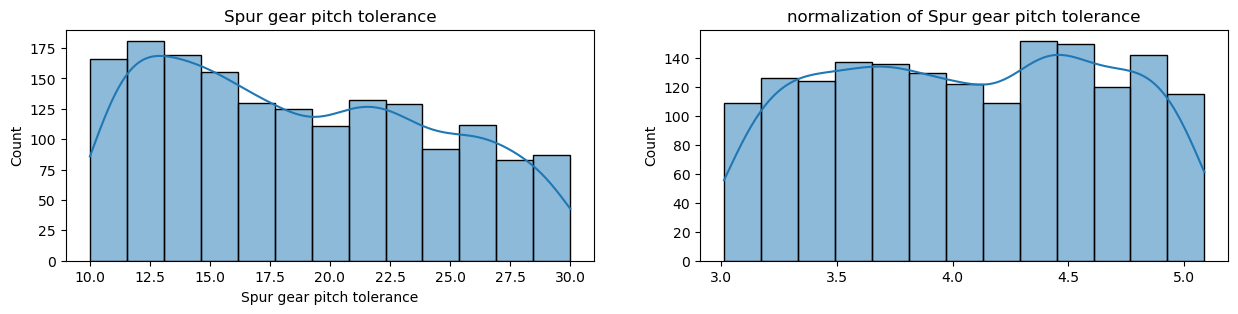

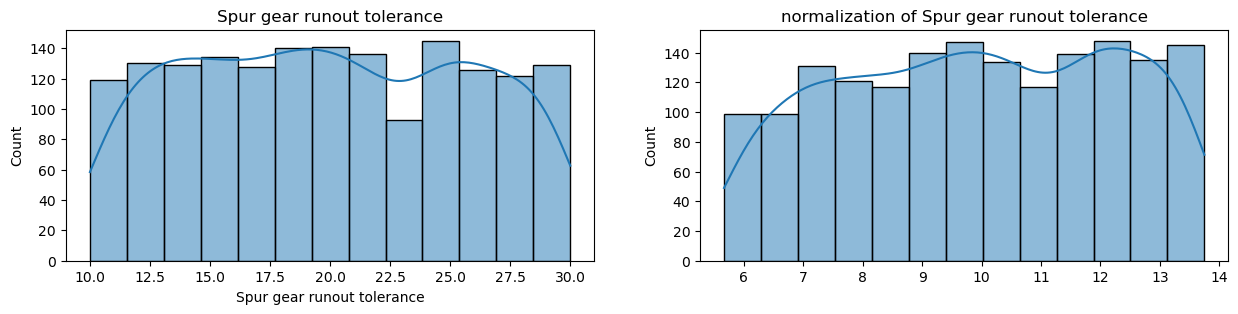

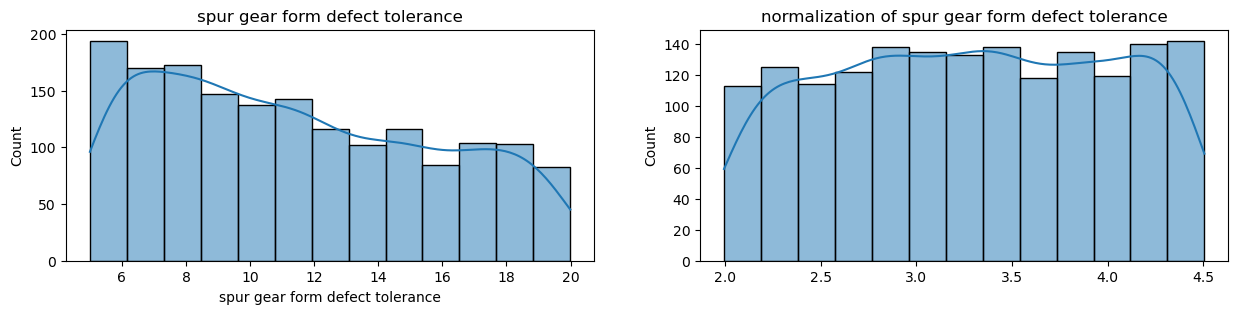

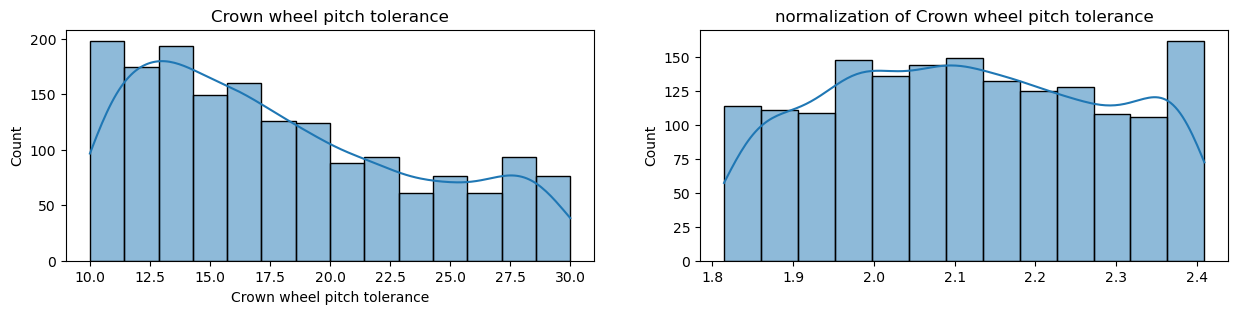

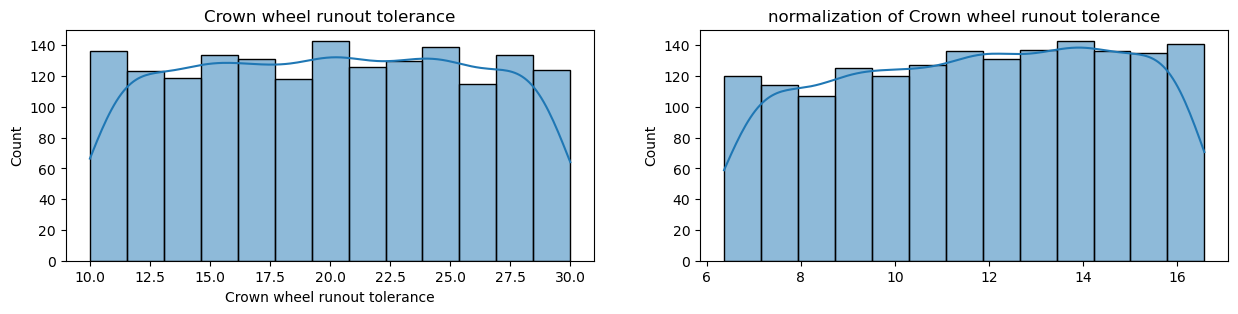

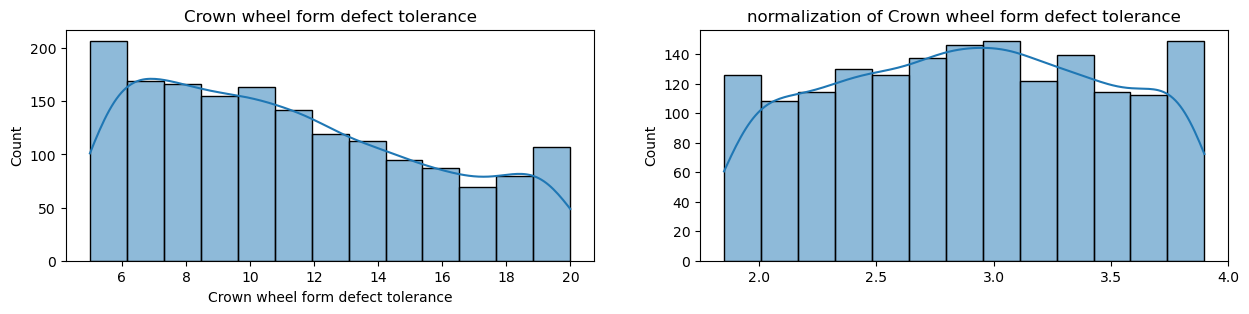

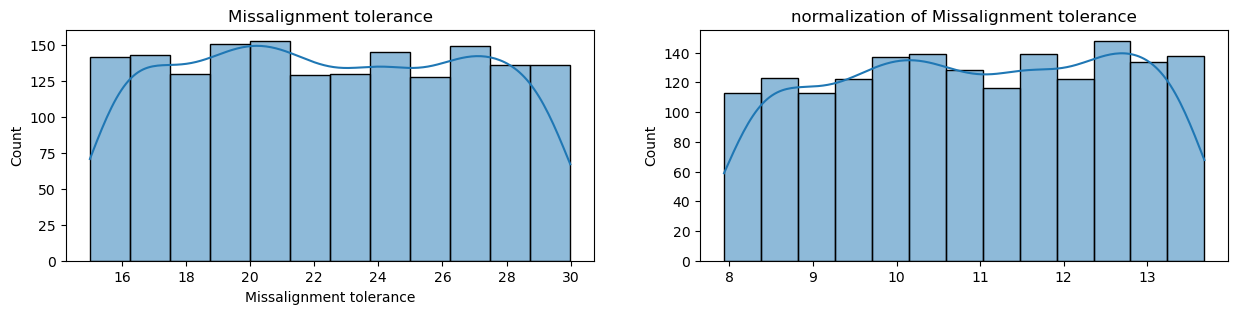

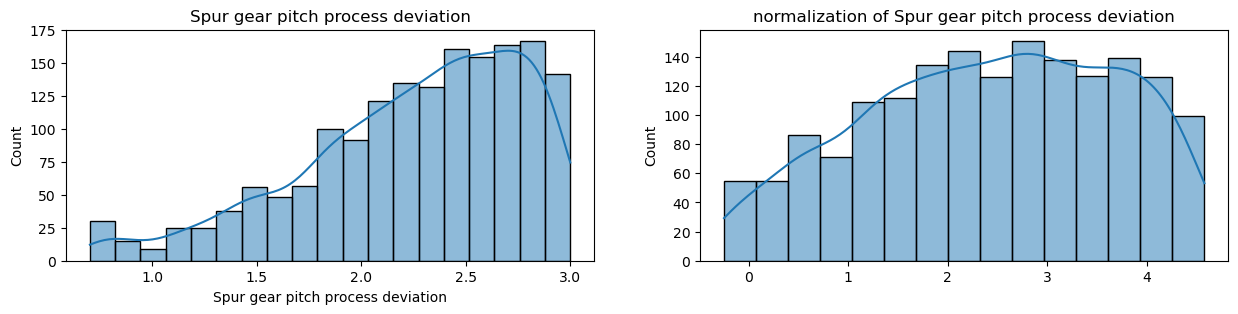

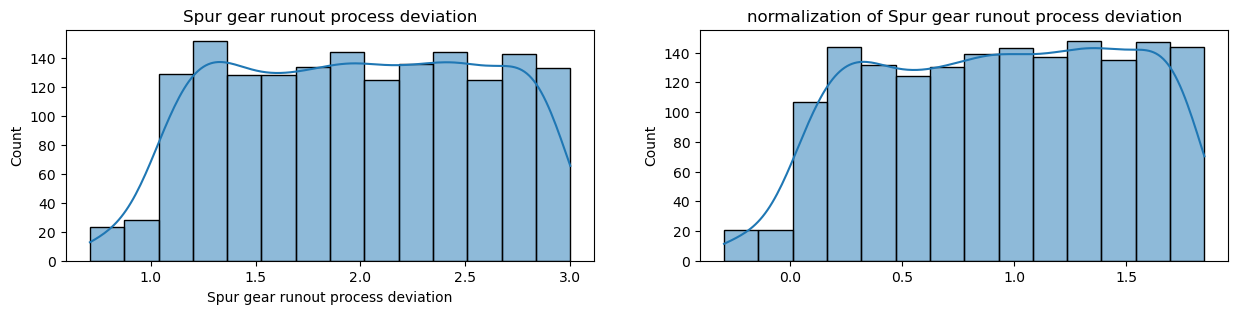

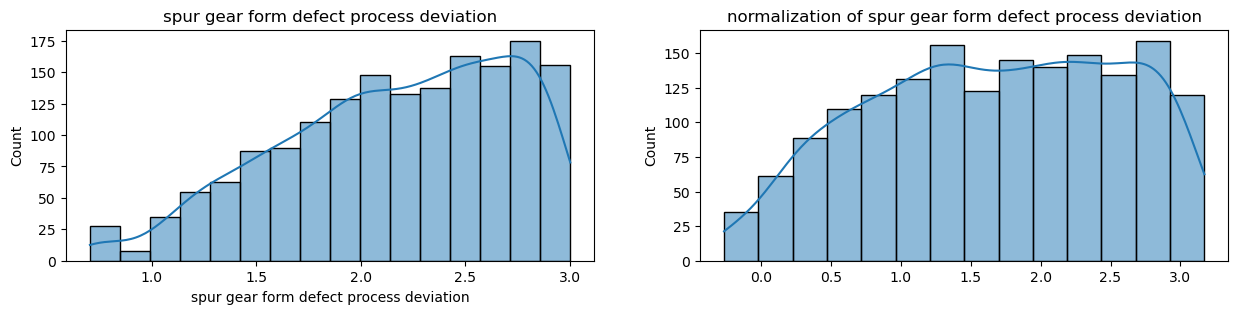

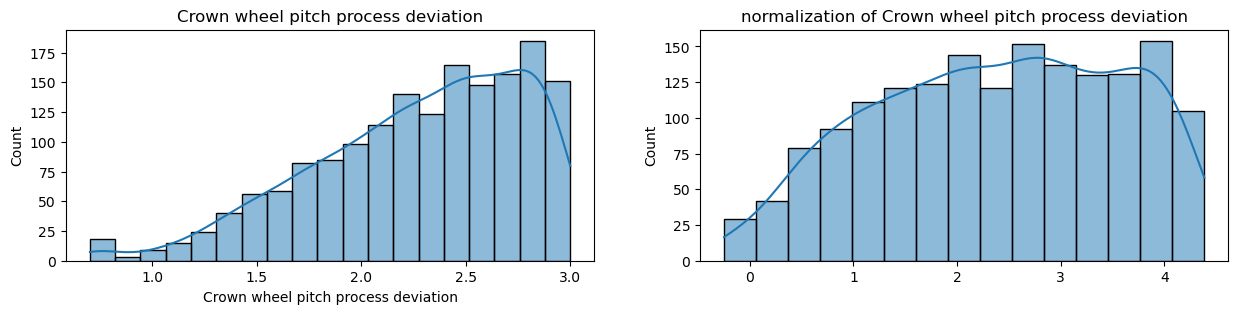

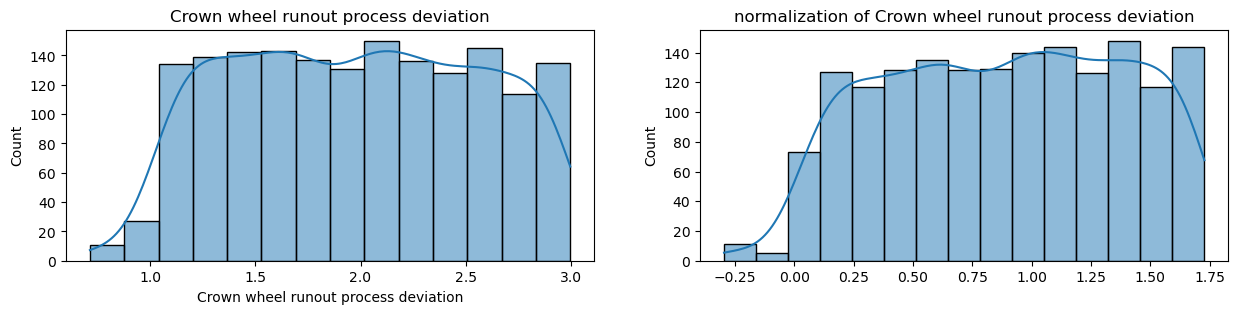

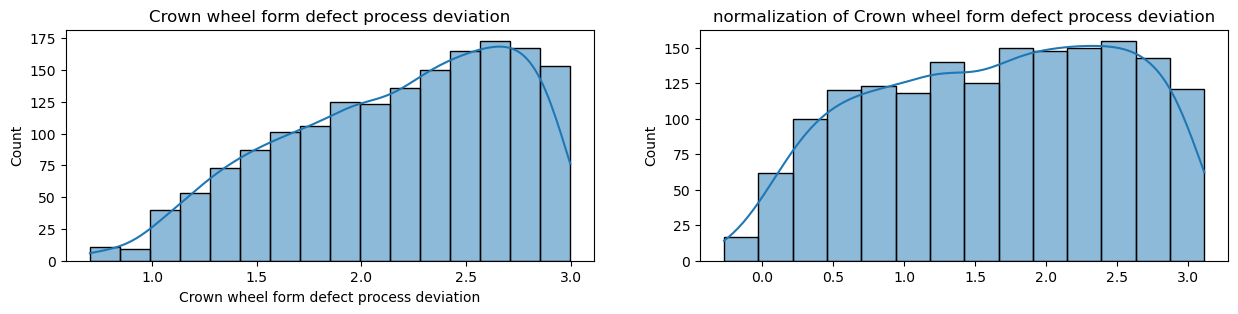

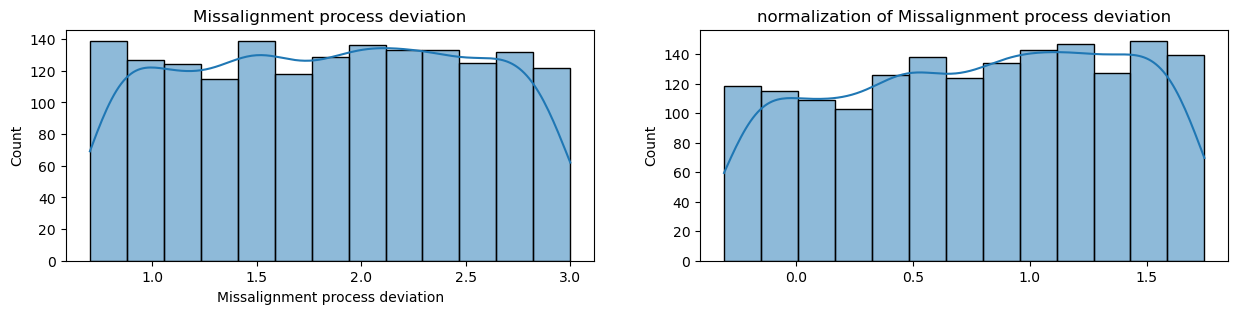

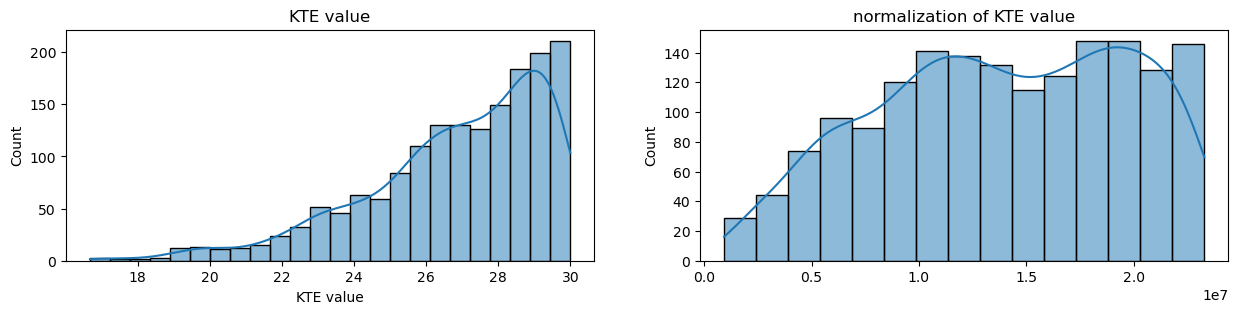

In [113]:
for column in columns[0:15]:
    normalization = stats.boxcox(df[column])
    fig, ax = plt.subplots(1, 2, figsize=(15,3))
    sns.histplot(df[column], ax=ax[0], kde=True, legend=False)
    ax[0].set_title(column)
    sns.histplot(normalization[0], ax=ax[1], kde=True, legend=False)
    ax[1].set_title("normalization of "+ column)
    plt.show()

In [4]:
features = df.columns
preprocessor = make_column_transformer(
    (StandardScaler(), features),
)

In [5]:
dfs = pd.DataFrame(preprocessor.fit_transform(df))
dfs.columns = df.columns
dfs

,Spur gear pitch tolerance,Spur gear runout tolerance,spur gear form defect tolerance,Crown wheel pitch tolerance,Crown wheel runout tolerance,Crown wheel form defect tolerance,Missalignment tolerance,Spur gear pitch process deviation,Spur gear runout process deviation,spur gear form defect process deviation,Crown wheel pitch process deviation,Crown wheel runout process deviation,Crown wheel form defect process deviation,Missalignment process deviation,KTE value,Assembled defects,Spur defetcs,Crown defects
0,-0.788182,0.995478,-1.124770,-0.888404,0.108736,-1.084211,-0.402955,0.347318,1.450152,0.689126,0.937961,-0.037051,0.662448,0.797912,-4.012849,0.090458,-0.415942,-0.414946
1,1.032671,0.354599,0.147817,-0.793663,0.778927,-0.290163,0.343314,1.119606,-0.079166,1.349311,1.014369,1.729373,1.211197,-0.711556,-3.939187,-0.428312,-0.415942,-0.414946
2,0.101590,-1.224282,0.860238,0.303781,-1.333138,-0.723134,-1.001443,-2.738014,1.568467,0.555271,0.780845,1.113321,0.199734,0.434143,-3.879712,1.876120,-0.415942,-0.414946
3,-0.078257,0.960140,-1.211461,-1.315051,-0.310887,-0.403597,0.021781,1.013638,1.340815,0.848308,1.357639,-0.653034,1.393337,1.358631,-3.750449,-0.450155,-0.415942,-0.412329
4,-0.112676,-0.754561,-1.332383,-0.724242,1.045168,-1.395635,-1.527185,1.267473,-1.063641,0.054104,0.976394,-1.377134,0.381801,-1.041541,-3.691172,-0.462897,-0.282754,0.542867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1.217735,0.093446,-1.240047,1.817817,-0.729745,0.269407,-0.652067,1.108994,-1.403809,0.577187,0.929362,1.252603,-0.464130,-1.038874,1.249331,-0.639461,1.076874,-0.414946
1668,-0.985195,1.264359,-0.545409,-1.149559,-0.414200,0.539404,-0.447834,1.338068,-1.234672,0.721147,1.077084,1.360635,-0.360451,-0.958246,1.249489,-0.763237,0.052991,-0.414946
1669,-0.599682,-0.383582,-0.823264,-1.004814,0.561107,0.830181,-1.048497,0.204709,1.133333,-1.433160,-1.429601,-1.121152,1.091112,0.170577,1.251544,-0.763237,-0.318826,-0.247459
1670,1.162662,0.787314,-0.128626,-0.498196,0.876653,1.100202,-0.844264,0.433802,1.302487,-1.289199,-1.281880,-1.013121,1.194791,0.251205,1.251702,-0.104308,-0.404843,-0.383542


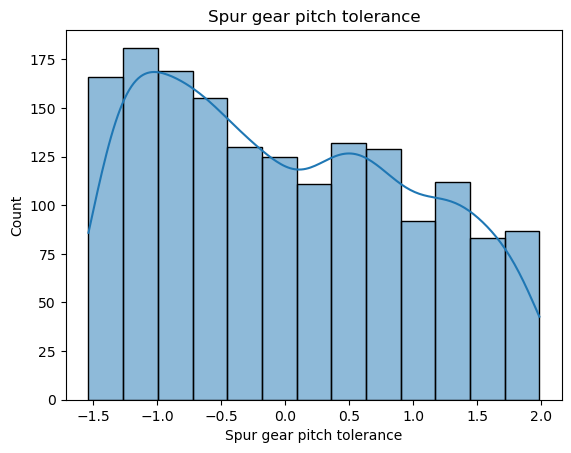

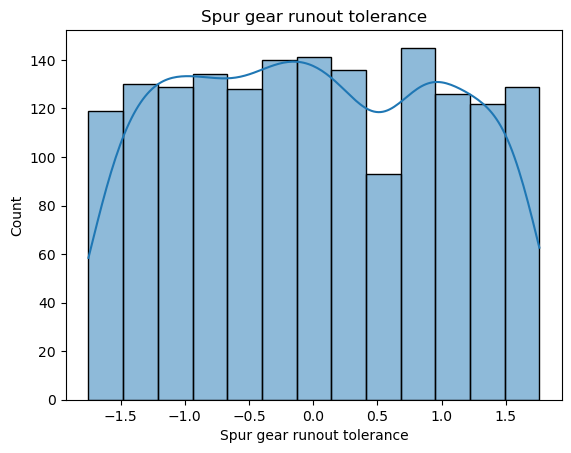

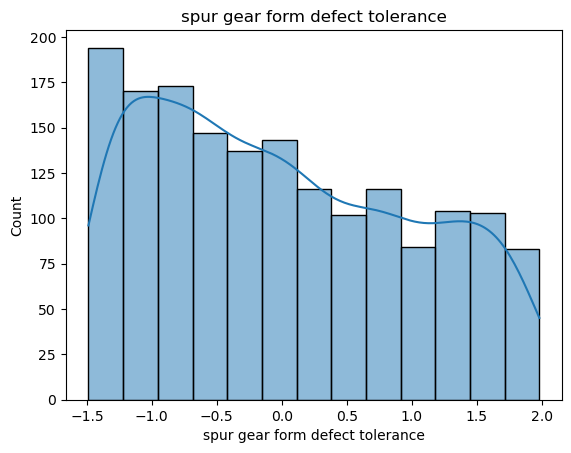

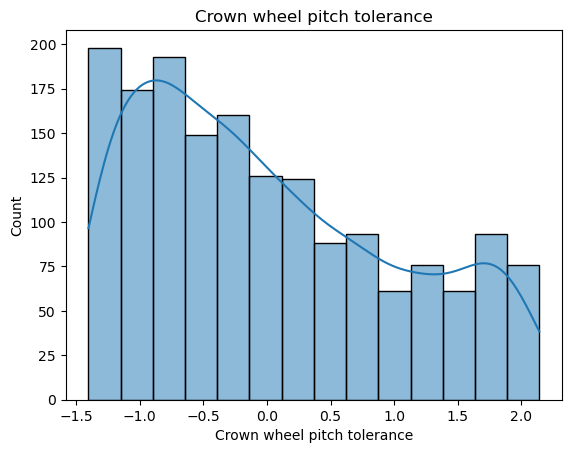

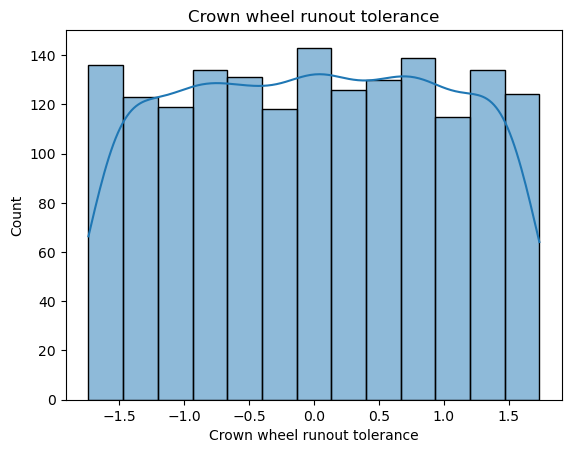

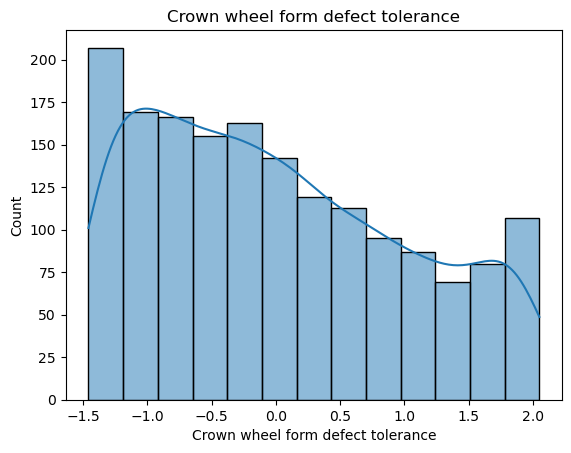

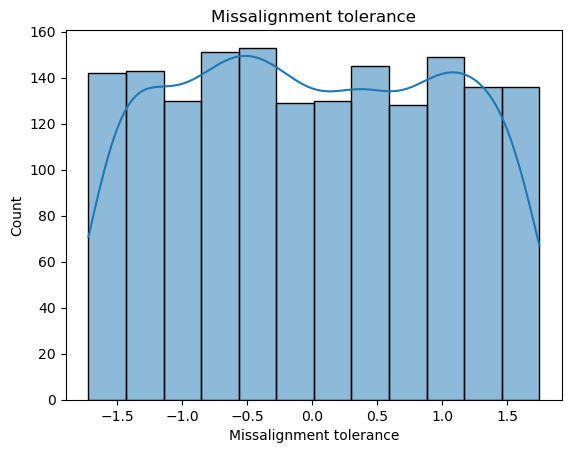

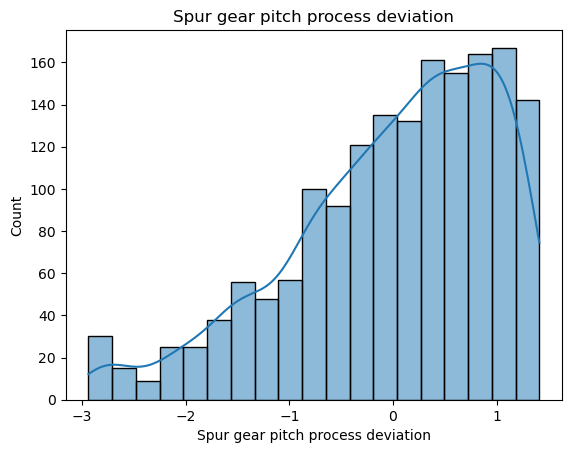

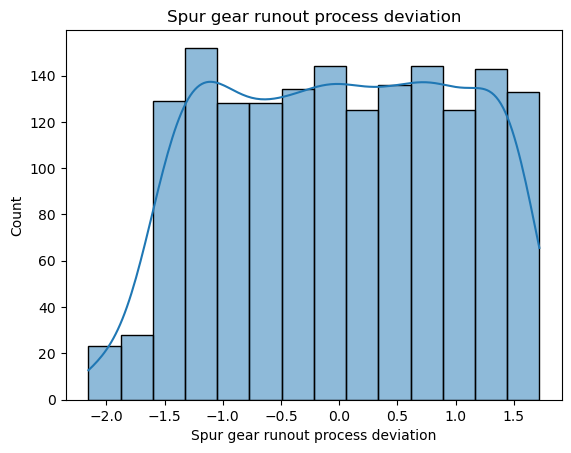

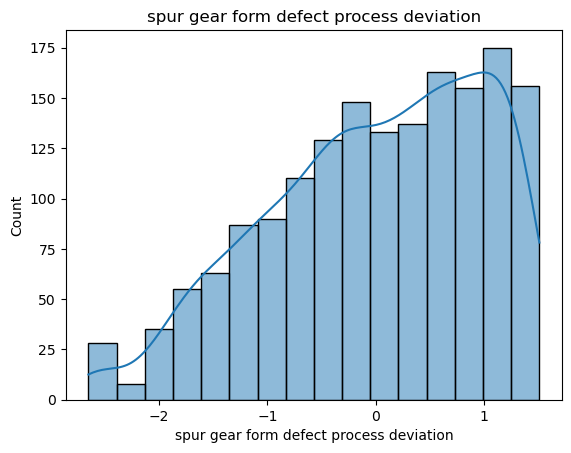

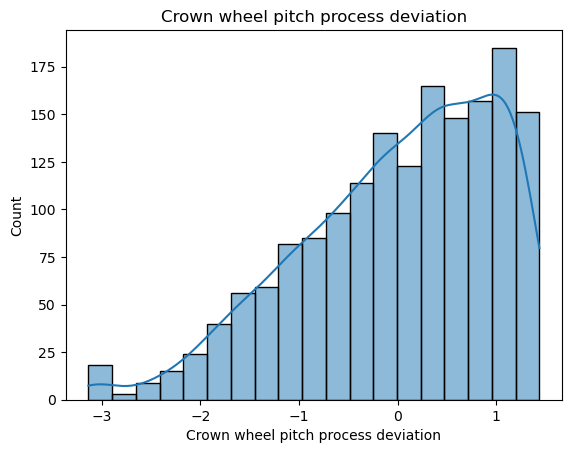

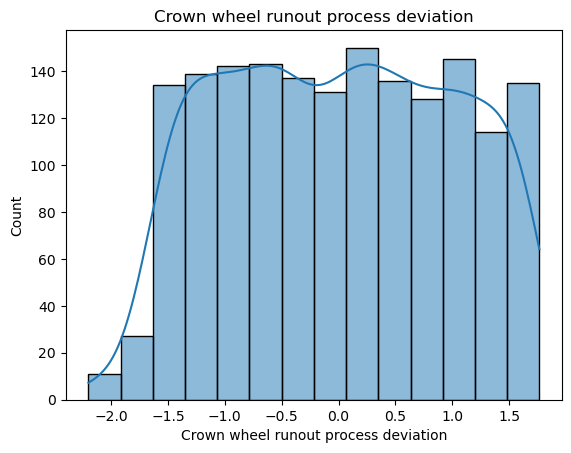

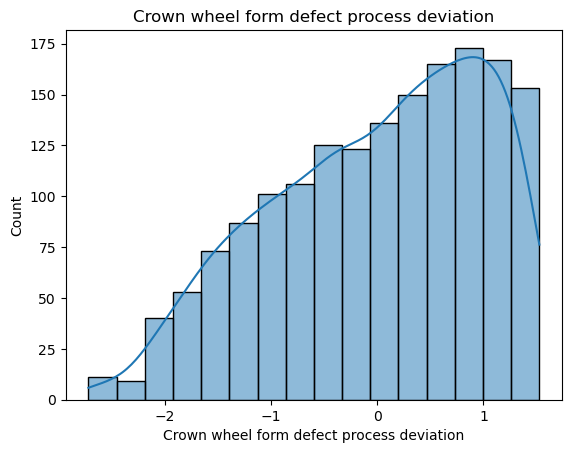

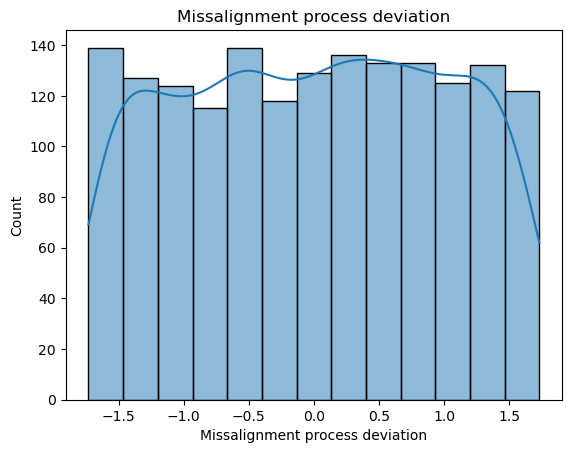

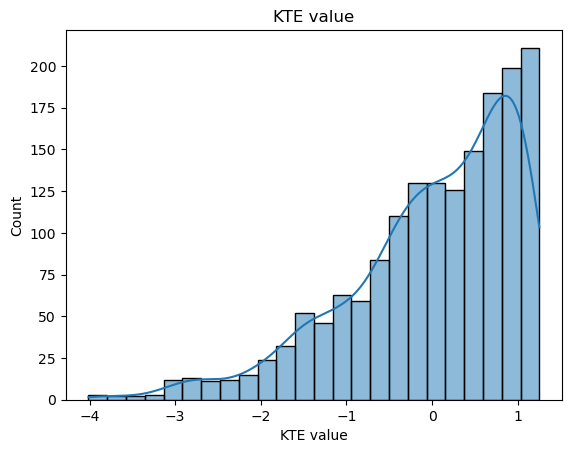

In [8]:
for column in columns[0:15]:
    sns.histplot(dfs[column], kde=True, legend=False).set(title=column)
    plt.show()

In [6]:
y = dfs[columns[15:]]
dfs.drop(columns[15:], axis=1, inplace=True)
dfs

,Spur gear pitch tolerance,Spur gear runout tolerance,spur gear form defect tolerance,Crown wheel pitch tolerance,Crown wheel runout tolerance,Crown wheel form defect tolerance,Missalignment tolerance,Spur gear pitch process deviation,Spur gear runout process deviation,spur gear form defect process deviation,Crown wheel pitch process deviation,Crown wheel runout process deviation,Crown wheel form defect process deviation,Missalignment process deviation,KTE value
0,-0.788182,0.995478,-1.124770,-0.888404,0.108736,-1.084211,-0.402955,0.347318,1.450152,0.689126,0.937961,-0.037051,0.662448,0.797912,-4.012849
1,1.032671,0.354599,0.147817,-0.793663,0.778927,-0.290163,0.343314,1.119606,-0.079166,1.349311,1.014369,1.729373,1.211197,-0.711556,-3.939187
2,0.101590,-1.224282,0.860238,0.303781,-1.333138,-0.723134,-1.001443,-2.738014,1.568467,0.555271,0.780845,1.113321,0.199734,0.434143,-3.879712
3,-0.078257,0.960140,-1.211461,-1.315051,-0.310887,-0.403597,0.021781,1.013638,1.340815,0.848308,1.357639,-0.653034,1.393337,1.358631,-3.750449
4,-0.112676,-0.754561,-1.332383,-0.724242,1.045168,-1.395635,-1.527185,1.267473,-1.063641,0.054104,0.976394,-1.377134,0.381801,-1.041541,-3.691172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1.217735,0.093446,-1.240047,1.817817,-0.729745,0.269407,-0.652067,1.108994,-1.403809,0.577187,0.929362,1.252603,-0.464130,-1.038874,1.249331
1668,-0.985195,1.264359,-0.545409,-1.149559,-0.414200,0.539404,-0.447834,1.338068,-1.234672,0.721147,1.077084,1.360635,-0.360451,-0.958246,1.249489
1669,-0.599682,-0.383582,-0.823264,-1.004814,0.561107,0.830181,-1.048497,0.204709,1.133333,-1.433160,-1.429601,-1.121152,1.091112,0.170577,1.251544
1670,1.162662,0.787314,-0.128626,-0.498196,0.876653,1.100202,-0.844264,0.433802,1.302487,-1.289199,-1.281880,-1.013121,1.194791,0.251205,1.251702


In [7]:
y.columns = ['Assembled defects', 'Spur defects', 'Crown defects']
X_train, X_test, y_train, y_test = train_test_split(dfs, y, train_size=0.7, test_size=0.3, random_state=0)
X_train

,Spur gear pitch tolerance,Spur gear runout tolerance,spur gear form defect tolerance,Crown wheel pitch tolerance,Crown wheel runout tolerance,Crown wheel form defect tolerance,Missalignment tolerance,Spur gear pitch process deviation,Spur gear runout process deviation,spur gear form defect process deviation,Crown wheel pitch process deviation,Crown wheel runout process deviation,Crown wheel form defect process deviation,Missalignment process deviation,KTE value
39,0.573369,-1.432183,0.020652,1.261533,0.631949,-0.724241,-1.028245,-0.033993,0.602860,1.455445,0.925203,0.821902,1.145834,-1.527023,-2.601937
597,1.100116,-0.225527,-1.256318,-1.179987,1.610155,0.363056,1.029684,0.416626,-1.137473,-0.229009,-1.454978,-0.812206,0.385200,-0.174658,-0.196120
937,0.397223,1.338530,0.555570,-0.947629,1.034547,1.708550,0.930761,-0.311871,-0.230686,0.580960,1.061878,0.034675,0.003535,1.606799,0.380883
1490,-0.094559,1.158117,0.674932,0.312700,-0.902096,-0.408137,-0.931938,0.070178,0.382580,0.502385,-0.004853,-0.791291,-1.164610,0.033655,1.060039
1320,0.998306,-0.334035,-1.294729,0.773321,-0.125207,-0.294700,-0.610405,0.176146,-0.868568,0.859610,-0.200541,1.591133,-1.346751,1.348114,0.871301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.416168,0.156394,-0.635879,-0.321605,-0.856349,-0.213584,-0.946103,-0.398185,0.224618,0.804149,-0.010545,0.478474,1.482846,0.667318,0.200602
1216,1.585607,0.058951,1.366004,1.916566,-0.112417,0.176483,0.504682,-0.741456,0.756359,0.735353,-2.230684,-0.841094,-0.044462,-1.665260,0.763654
1653,-1.486017,0.859606,0.588241,-1.025489,0.959869,-0.936846,-0.100170,-0.542837,0.089058,1.138097,-2.182558,0.274484,-0.572871,-0.800742,1.237041
559,1.712795,-0.684904,-0.773961,-0.769370,0.739150,0.442946,-1.326285,0.813884,-0.100875,1.131094,0.250943,-1.819591,0.046340,1.336693,-0.263419


In [8]:
y_train1 = y_train[["Assembled defects"]]
y_train2 = y_train[["Spur defects"]]
y_train3 = y_train[["Crown defects"]]

In [9]:
y_test1 = y_test[["Assembled defects"]]
y_test2 = y_test[["Spur defects"]]
y_test3 = y_test[["Crown defects"]]

In [13]:
model = keras.Sequential([
    layers.Dense(1, activation='relu', input_shape=[15]),
    layers.Dense(1, activation='relu'),
    layers.Dense(1, activation='relu'),
    layers.Dense(1, activation='relu'),
    layers.Dense(1, activation='relu'),
    layers.Dense(1),
])

In [14]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [15]:
history = model.fit(
    X_train, y_train2,
    validation_data=(X_test, y_test2),
    batch_size=256,
    epochs=50,
)

Epoch 1/50
5/5 [==============================] - 2s 70ms/step - loss: 0.6339 - val_loss: 0.5711
Epoch 2/50
5/5 [==============================] - 0s 21ms/step - loss: 0.6308 - val_loss: 0.5681
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6278 - val_loss: 0.5651
Epoch 4/50
5/5 [==============================] - 0s 13ms/step - loss: 0.6247 - val_loss: 0.5621
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6217 - val_loss: 0.5591
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6188 - val_loss: 0.5561
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: 0.6157 - val_loss: 0.5531
Epoch 8/50
5/5 [==============================] - 0s 11ms/step - loss: 0.6127 - val_loss: 0.5502
Epoch 9/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6097 - val_loss: 0.5473
Epoch 10/50
5/5 [==============================] - 0s 11ms/step - loss: 0.6067 - val_loss: 0.5443
Epoch 11/50
5/5 [================

<Axes: >

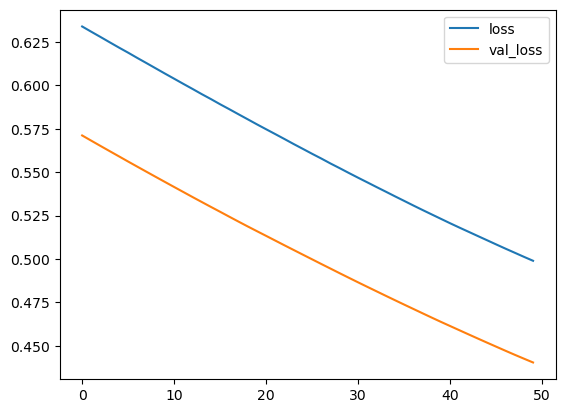

In [16]:
history_data = pd.DataFrame(history.history)
history_data.loc[:,['loss', 'val_loss']].plot()

In [10]:
def dif_Config(X_train, y_train, X_test, y_test, input_shape):
    neurons = [80, 60, 40, 20, 15, 10, 8, 6, 4, 2, 1]
    stock_loss = pd.DataFrame()
    stock_val_loss = pd.DataFrame()
    for i in neurons:
        model = keras.Sequential([
            layers.Dense(i, activation='relu', input_shape=[input_shape]),
            layers.Dense(i, activation='relu'),
            layers.Dense(i, activation='relu'),
            layers.Dense(i, activation='relu'),
            layers.Dense(i, activation='relu'),
            layers.Dense(1),
        ])
        model.compile(
            optimizer='adam',
            loss='mae'
        )
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            batch_size=256,
            epochs=50,
            verbose=0,
        )
        history_data = pd.DataFrame(history.history)
        stock_loss.insert(0,"loss_"+str(i), history_data["loss"], True)
        stock_val_loss.insert(0,"val_loss_"+str(i), history_data["val_loss"], True)
    #Plot the loss and val_loss of all the configurations
    loss=[]
    val_loss=[]
    for j in neurons:
        loss.append('loss_'+str(j))
        val_loss.append('val_loss_'+str(j))
    stock_loss.loc[:, loss].plot()
    plt.title(y_train.columns)
    stock_val_loss.loc[:, val_loss].plot()

In [11]:
input_shape = X_train.shape[1]
input_shape

15

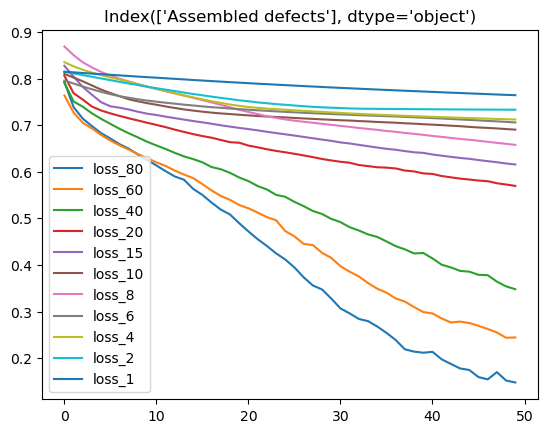

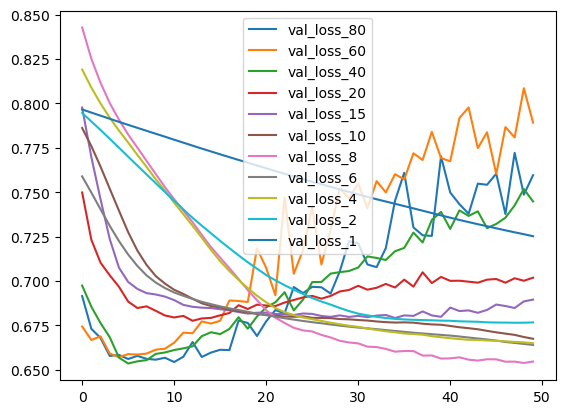

In [54]:
dif_Config(X_train, y_train1, X_test, y_test1, input_shape)

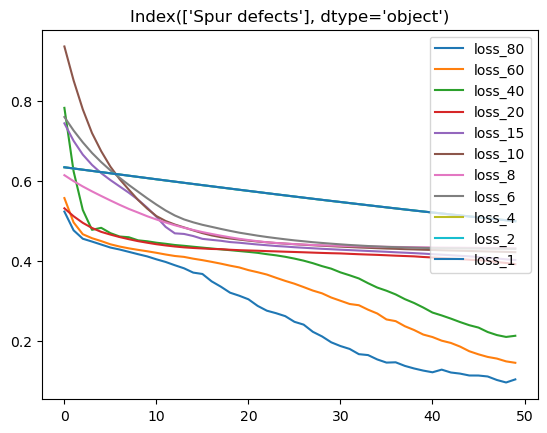

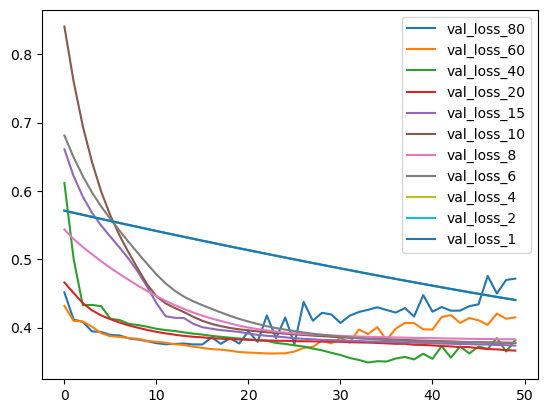

In [58]:
dif_Config(X_train, y_train2, X_test, y_test2, input_shape)

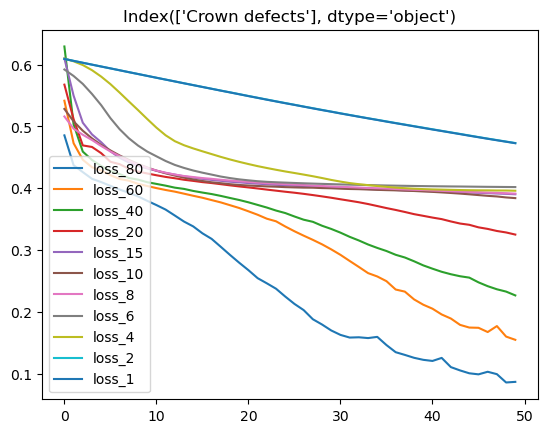

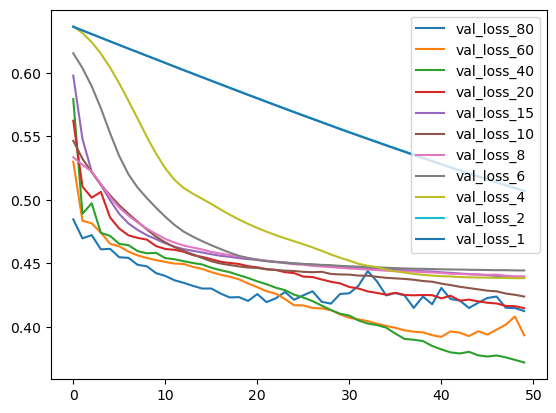

In [60]:
dif_Config(X_train, y_train3, X_test, y_test3, input_shape)

In [12]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [13]:
mi_scores_assembled = make_mi_scores(dfs, y[["Assembled defects"]])
mi_scores_assembled

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Crown wheel runout process deviation         0.024726
Missalignment tolerance                      0.017984
Crown wheel pitch tolerance                  0.016847
Spur gear runout process deviation           0.015368
KTE value                                    0.013666
Spur gear pitch tolerance                    0.008643
Crown wheel form defect tolerance            0.004671
Spur gear runout tolerance                   0.000000
spur gear form defect tolerance              0.000000
Crown wheel runout tolerance                 0.000000
Spur gear pitch process deviation            0.000000
spur gear form defect process deviation      0.000000
Crown wheel pitch process deviation          0.000000
Crown wheel form defect process deviation    0.000000
Missalignment process deviation              0.000000
Name: MI Scores, dtype: float64

In [14]:
mi_scores_spur = make_mi_scores(dfs, y[["Spur defects"]])
mi_scores_spur

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Spur gear runout process deviation           0.618194
spur gear form defect process deviation      0.243894
Spur gear pitch process deviation            0.090003
KTE value                                    0.087586
Crown wheel runout tolerance                 0.021610
Crown wheel pitch tolerance                  0.018317
Crown wheel form defect tolerance            0.000835
Spur gear pitch tolerance                    0.000000
Spur gear runout tolerance                   0.000000
spur gear form defect tolerance              0.000000
Missalignment tolerance                      0.000000
Crown wheel pitch process deviation          0.000000
Crown wheel runout process deviation         0.000000
Crown wheel form defect process deviation    0.000000
Missalignment process deviation              0.000000
Name: MI Scores, dtype: float64

In [15]:
mi_scores_crown = make_mi_scores(dfs, y[["Crown defects"]])
mi_scores_crown

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Crown wheel runout process deviation         0.617708
Crown wheel form defect process deviation    0.280540
KTE value                                    0.147236
Crown wheel pitch process deviation          0.101914
spur gear form defect tolerance              0.023588
Crown wheel runout tolerance                 0.016413
Missalignment process deviation              0.001849
Spur gear pitch tolerance                    0.000000
Spur gear runout tolerance                   0.000000
Crown wheel pitch tolerance                  0.000000
Crown wheel form defect tolerance            0.000000
Missalignment tolerance                      0.000000
Spur gear pitch process deviation            0.000000
Spur gear runout process deviation           0.000000
spur gear form defect process deviation      0.000000
Name: MI Scores, dtype: float64

In [34]:
y_train2.columns

Index(['Spur defects'], dtype='object')

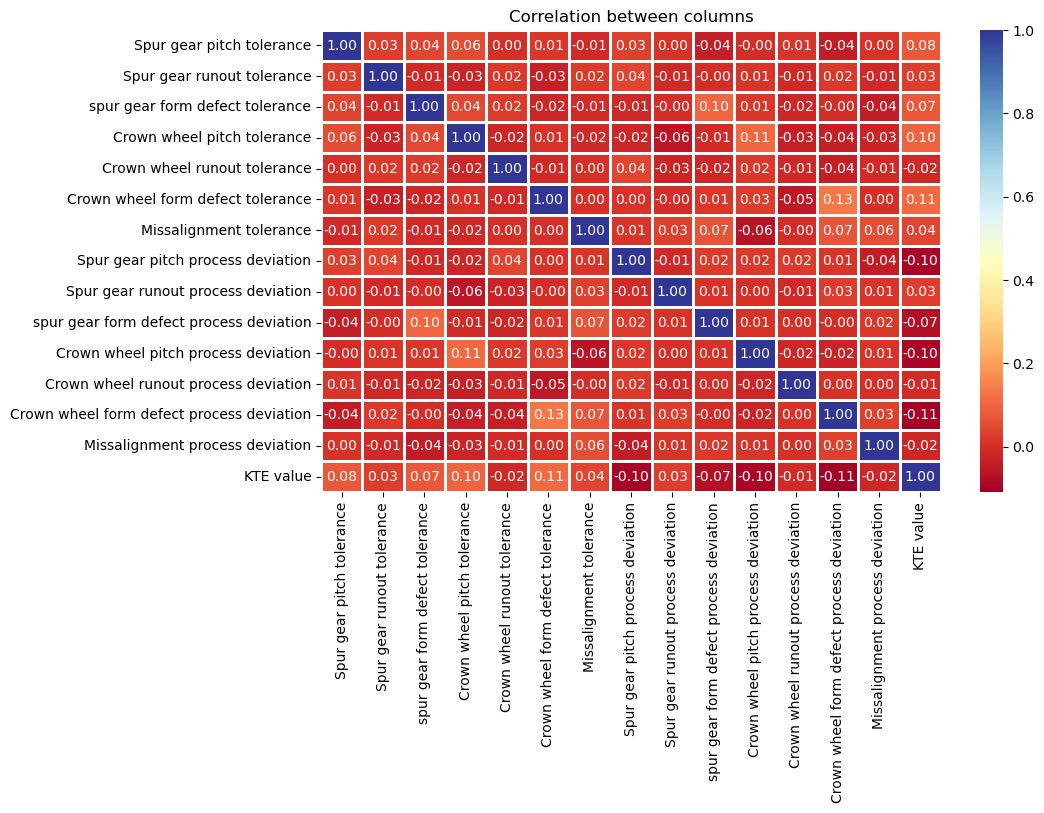

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(dfs.corr(), annot=True, cmap='RdYlBu', fmt='.2f', annot_kws=None, linewidths=1)
plt.title("Correlation between columns")
plt.show()

In [16]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.0]

In [17]:
X_train_assembled = drop_uninformative(X_train, mi_scores_assembled)
X_test_assembled = X_test[X_train_assembled.columns]
X_train_assembled

,Spur gear pitch tolerance,Crown wheel pitch tolerance,Crown wheel form defect tolerance,Missalignment tolerance,Spur gear runout process deviation,Crown wheel runout process deviation,KTE value
39,0.573369,1.261533,-0.724241,-1.028245,0.602860,0.821902,-2.601937
597,1.100116,-1.179987,0.363056,1.029684,-1.137473,-0.812206,-0.196120
937,0.397223,-0.947629,1.708550,0.930761,-0.230686,0.034675,0.380883
1490,-0.094559,0.312700,-0.408137,-0.931938,0.382580,-0.791291,1.060039
1320,0.998306,0.773321,-0.294700,-0.610405,-0.868568,1.591133,0.871301
...,...,...,...,...,...,...,...
835,0.416168,-0.321605,-0.213584,-0.946103,0.224618,0.478474,0.200602
1216,1.585607,1.916566,0.176483,0.504682,0.756359,-0.841094,0.763654
1653,-1.486017,-1.025489,-0.936846,-0.100170,0.089058,0.274484,1.237041
559,1.712795,-0.769370,0.442946,-1.326285,-0.100875,-1.819591,-0.263419


In [18]:
X_train_spur = drop_uninformative(X_train, mi_scores_spur)
X_test_spur = X_test[X_train_spur.columns]
X_test_spur

,Crown wheel pitch tolerance,Crown wheel runout tolerance,Crown wheel form defect tolerance,Spur gear pitch process deviation,Spur gear runout process deviation,spur gear form defect process deviation,KTE value
1010,-0.996374,-0.409931,0.802662,-0.744634,-0.995202,-0.292508,0.496078
1505,1.927117,0.649530,-1.029634,0.371606,0.419352,0.234512,1.077072
818,0.805380,-0.572094,-0.422884,0.204047,1.533318,-1.231180,0.181198
776,-0.746992,0.019879,-0.136900,0.348093,-0.143717,-1.315560,0.108090
1211,-1.133530,0.057088,-0.448201,-0.319456,-0.780635,1.157273,0.755514
...,...,...,...,...,...,...,...
708,-0.120738,1.466960,0.770579,0.997900,0.789919,-0.298150,-0.006947
795,-0.054261,0.570114,0.468617,0.938882,0.430207,-0.129208,0.139388
1366,-1.168976,-0.346880,1.141621,-0.715427,-0.235792,-0.654359,0.929867
77,1.846898,-1.716940,-0.808673,-1.726418,-1.608146,1.019482,-1.983282


In [19]:
X_train_crown = drop_uninformative(X_train, mi_scores_crown)
X_test_crown = X_test[X_train_crown.columns]
X_test_crown

,spur gear form defect tolerance,Crown wheel runout tolerance,Crown wheel pitch process deviation,Crown wheel runout process deviation,Crown wheel form defect process deviation,Missalignment process deviation,KTE value
1010,1.973952,-0.409931,1.328899,-0.011967,-0.155790,-1.582798,0.496078
1505,1.042812,0.649530,-1.315377,-0.350410,-1.986487,-1.089548,1.077072
818,-1.475002,-0.572094,-1.063741,-1.582931,0.645784,0.500427,0.181198
776,0.057653,0.019879,-0.549204,1.076946,0.511769,-1.132807,0.108090
1211,1.971729,0.057088,-1.206089,1.205649,-1.498538,0.830533,0.755514
...,...,...,...,...,...,...,...
708,-0.538074,1.466960,-0.668504,1.231602,0.878378,-1.327823,-0.006947
795,1.119060,0.570114,-1.402234,-0.093872,1.146499,-1.445957,0.139388
1366,-1.421209,-0.346880,-1.468034,0.326893,1.371759,-1.455202,0.929867
77,-1.456152,-1.716940,-0.794551,-0.036269,0.263379,-1.345049,-1.983282


In [20]:
input_shape_2 = X_train_assembled.shape[1]
input_shape_2

7

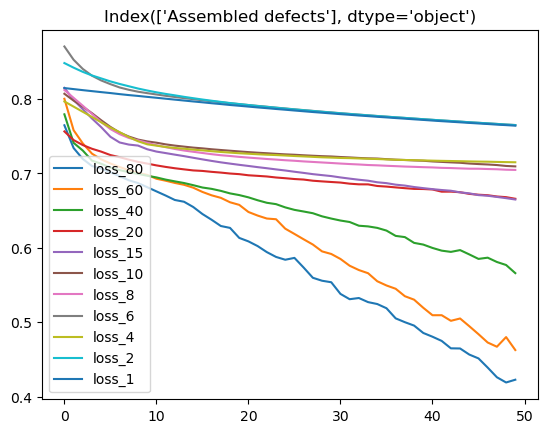

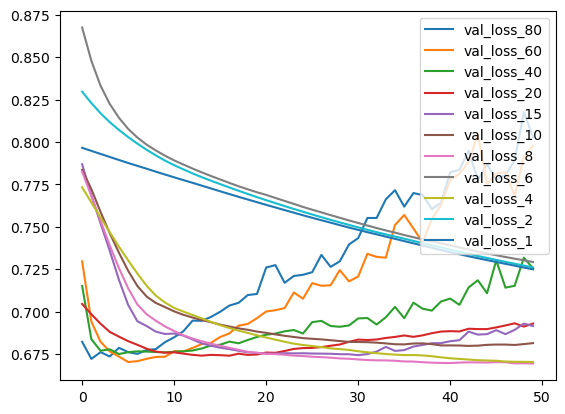

In [57]:
dif_Config(X_train_assembled, y_train1, X_test_assembled, y_test1, input_shape_2)

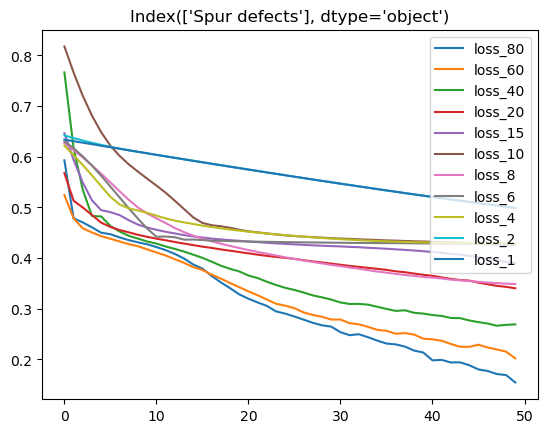

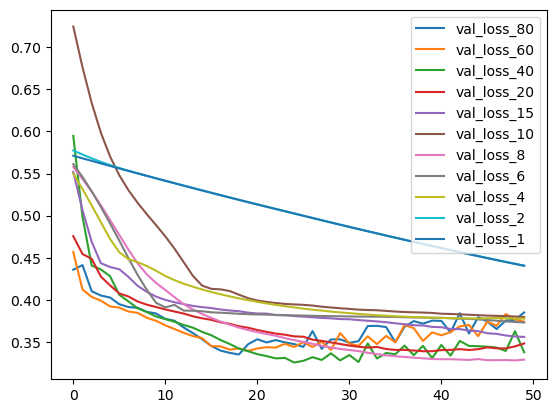

In [59]:
dif_Config(X_train_spur, y_train2, X_test_spur, y_test2, input_shape_2)

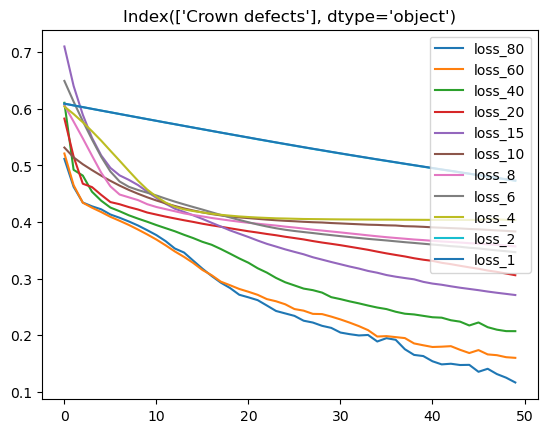

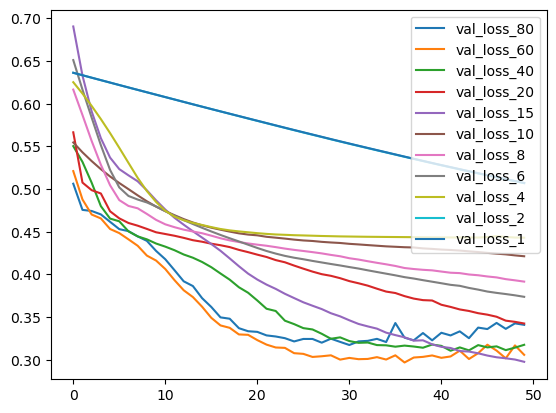

In [61]:
dif_Config(X_train_crown, y_train3, X_test_crown, y_test3, input_shape_2)

In [22]:
pca = PCA()
X_assembled = drop_uninformative(dfs, mi_scores_assembled)
X_pca_assembled = pca.fit_transform(X_assembled)
names = [f"PC{i+1}" for i in range(X_pca_assembled.shape[1])]
X_pca_assembled = pd.DataFrame(X_pca_assembled, columns=names)
X_pca_assembled

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.801475,-0.240397,0.391076,-0.765718,1.324391,0.245669,1.973072
1,2.877188,0.738590,-1.224894,-0.364470,-0.290417,1.802339,2.573493
2,2.913391,0.699957,-0.621216,-1.314394,1.046653,-0.204712,2.855072
3,3.118521,-0.767313,0.645727,-0.903901,1.265319,1.220603,1.884173
4,3.147217,1.943048,1.661461,-0.687968,1.418249,1.459188,0.644260
...,...,...,...,...,...,...,...
1667,-2.004848,2.104536,-1.096106,0.155387,-0.785290,-0.304597,0.045712
1668,0.149480,0.176645,-0.114565,0.047363,-2.376989,-0.447372,-1.342176
1669,-0.529204,-1.341009,1.148014,-1.493430,-0.023042,-0.664247,-1.094176
1670,-1.562301,-1.091615,0.261686,-1.910640,0.418447,0.254721,-0.470573


In [23]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns = names,
    index = X_assembled.columns
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Spur gear pitch tolerance,-0.390346,0.167389,-0.473446,-0.333173,0.244628,0.644948,0.093031
Crown wheel pitch tolerance,-0.471961,0.435683,0.002725,0.291293,0.306039,-0.430527,0.472823
Crown wheel form defect tolerance,-0.429067,-0.264724,0.389671,-0.237805,-0.570684,0.124794,0.442916
Missalignment tolerance,-0.075969,-0.502116,-0.211422,0.764012,0.021768,0.291258,0.168492
Spur gear runout process deviation,0.032635,-0.637867,-0.231073,-0.403254,0.401264,-0.382629,0.261981
Crown wheel runout process deviation,0.184035,0.144667,-0.705913,-0.011438,-0.582023,-0.258738,0.202638
KTE value,-0.632519,-0.179328,-0.166107,0.033678,-0.143454,-0.291432,-0.658425


In [27]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

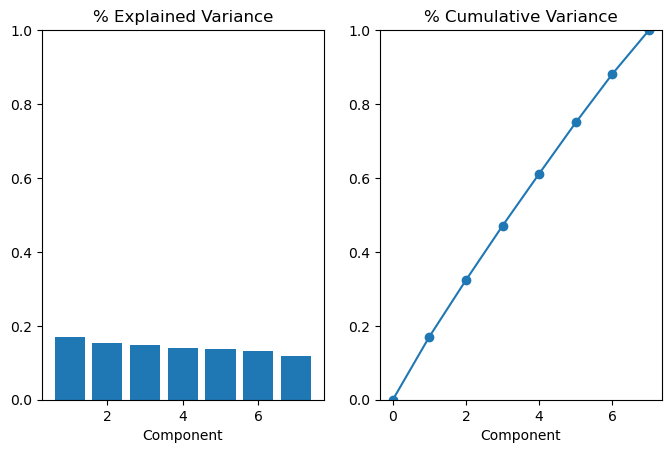

In [28]:
plot_variance(pca)

In [29]:
pca = PCA()
X_spur = drop_uninformative(dfs, mi_scores_spur)
X_pca_spur = pca.fit_transform(X_spur)
names = [f"PC{i+1}" for i in range(X_pca_assembled.shape[1])]
X_pca_spur = pd.DataFrame(X_pca_spur, columns=names)
X_pca_spur

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.767663,-1.203078,0.247722,0.796366,0.068878,0.331271,2.079734
1,4.016978,0.256497,-0.811855,0.002964,0.378848,-0.195034,1.695835
2,1.525790,-2.085386,0.113569,2.858308,0.924469,-0.406687,3.439483
3,3.773705,-1.414912,-0.403797,0.176599,-0.457303,-0.001394,1.718561
4,3.971600,1.413655,0.526223,0.475508,-0.159873,-0.516746,1.167290
...,...,...,...,...,...,...,...
1667,-1.164512,1.690568,-1.652446,0.421339,-0.840785,0.587730,-0.910784
1668,0.110429,0.329823,-1.121525,-0.951463,-0.461003,-0.880218,-1.977052
1669,-0.933104,-0.920573,1.263081,-1.819479,-0.485910,-0.021591,-0.315846
1670,-1.043863,-0.666205,1.008855,-2.093234,-0.430425,0.468989,-0.050003


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

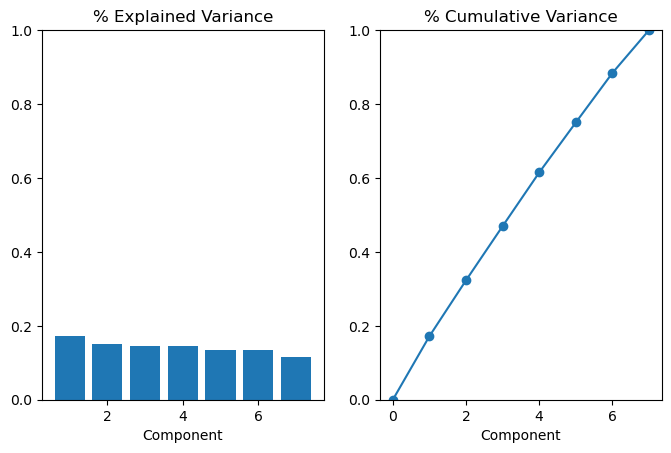

In [30]:
plot_variance(pca)

In [31]:
pca = PCA()
X_crown = drop_uninformative(dfs, mi_scores_crown)
X_pca_crown = pca.fit_transform(X_crown)
names = [f"PC{i+1}" for i in range(X_pca_assembled.shape[1])]
X_pca_crown = pd.DataFrame(X_pca_crown, columns=names)
X_pca_crown

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.928207,-0.970882,0.391524,-0.200934,0.008122,0.465206,1.597797
1,3.331299,-1.241508,-0.225612,-2.589906,0.954201,-0.087818,1.350236
2,2.926557,-0.438315,-0.512748,-1.402548,-0.680745,-1.171633,2.612273
3,4.405297,-0.879313,-0.134282,0.587518,-0.307946,0.198796,1.004820
4,2.975344,-2.235257,-0.030019,-0.402657,-0.109327,2.291263,1.139683
...,...,...,...,...,...,...,...
1667,-0.482126,0.540393,1.188989,-1.290647,-1.289161,0.013665,-1.446520
1668,-0.646412,0.173999,0.886960,-1.394859,-0.908191,-0.453901,-1.370607
1669,-0.494388,1.030348,-0.556356,1.304446,0.952586,1.324038,-1.049613
1670,-0.658673,0.663954,-0.858385,1.200235,1.333556,0.856472,-0.973699


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

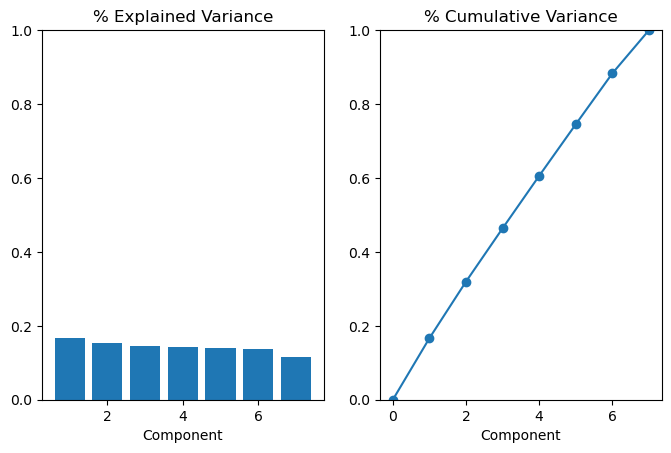

In [32]:
plot_variance(pca)

In [43]:
def dif_Config_imp(X_train, y_train, X_test, y_test, input_shape):
    neurons = [80, 60, 40, 20, 15, 10, 8, 6, 4, 2]
    stock_loss = pd.DataFrame()
    stock_val_loss = pd.DataFrame()
    for i in neurons:
        early_stopping = callbacks.EarlyStopping(
            min_delta=0.001,
            patience=20,
            restore_best_weights=True,
        )
        model = keras.Sequential([
            layers.Dense(i, activation='relu', input_shape=[input_shape]),
            layers.Dropout(0.3),
            layers.BatchNormalization(),
            layers.Dense(i, activation='relu'),
            layers.Dropout(0.3),
            layers.BatchNormalization(),
            layers.Dense(i, activation='relu'),
            layers.Dropout(0.3),
            layers.BatchNormalization(),
            layers.Dense(i, activation='relu'),
            layers.Dropout(0.3),
            layers.BatchNormalization(),
            layers.Dense(i, activation='relu'),
            layers.Dropout(0.3),
            layers.BatchNormalization(),
            layers.Dense(1),
        ])
        model.compile(
            optimizer='adam',
            loss='mae'
        )
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            batch_size=256,
            epochs=500,
            callbacks=[early_stopping],
            verbose=0,
        )
        history_data = pd.DataFrame(history.history)
        stock_loss.insert(0,"loss_"+str(i), history_data["loss"], True)
        stock_val_loss.insert(0,"val_loss_"+str(i), history_data["val_loss"], True)
    #Plot the loss and val_loss of all the configurations
    loss=[]
    val_loss=[]
    for j in neurons:
        loss.append('loss_'+str(j))
        val_loss.append('val_loss_'+str(j))
    stock_loss.loc[:, loss].plot()
    plt.title(y_train.columns)
    stock_val_loss.loc[:, val_loss].plot()

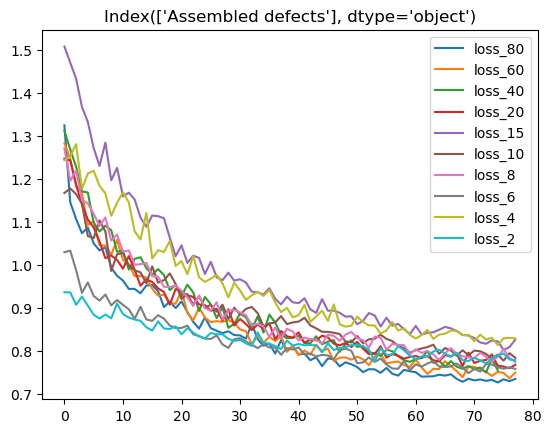

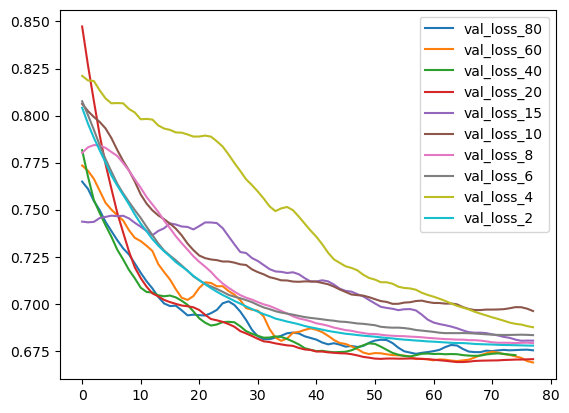

In [44]:
dif_Config_imp(X_train_assembled, y_train1, X_test_assembled, y_test1, input_shape_2)

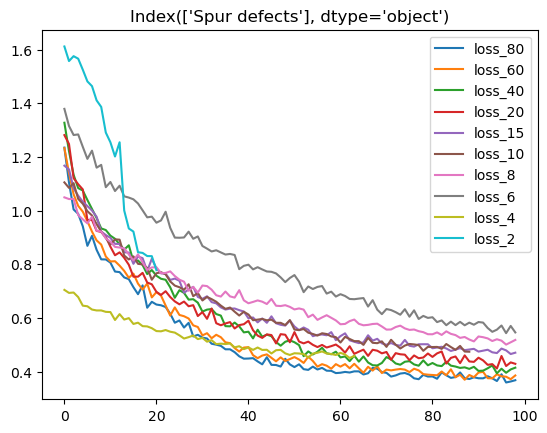

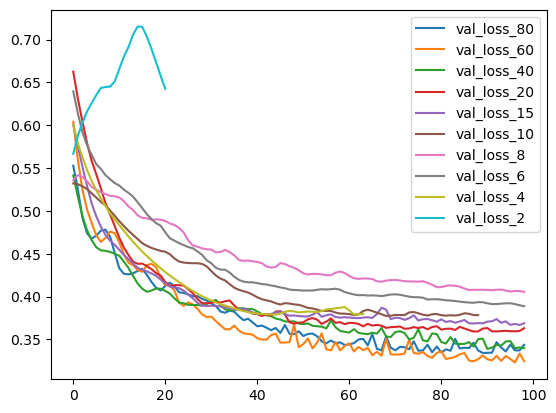

In [45]:
dif_Config_imp(X_train_spur, y_train2, X_test_spur, y_test2, input_shape_2)

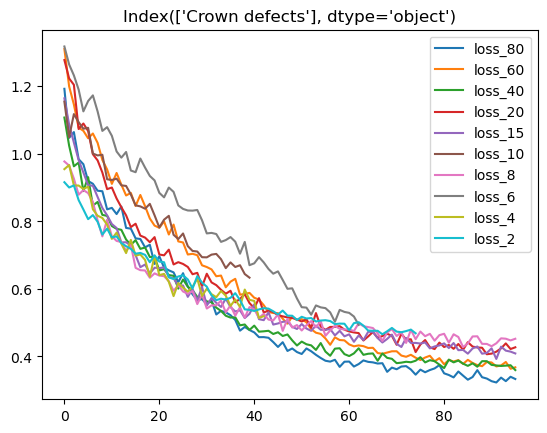

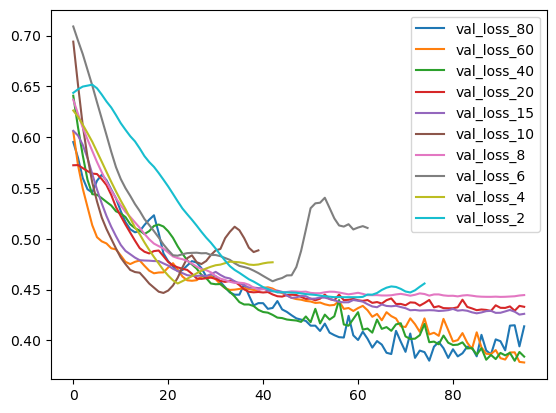

In [46]:
dif_Config_imp(X_train_crown, y_train3, X_test_crown, y_test3, input_shape_2)